In [2]:
# imports
import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt

# api keys
from config import wkey, epakey, censuskey

In [ ]:
# Abby's section starts here

In [2]:
# PurpleAir API

base_url = "https://www.purpleair.com/json"
response = requests.get(base_url)
puruple_air = response.json()

puruple_air['results'][0]

{'ID': 14633,
 'Label': ' Hazelwood canary ',
 'DEVICE_LOCATIONTYPE': 'outside',
 'THINGSPEAK_PRIMARY_ID': '559921',
 'THINGSPEAK_PRIMARY_ID_READ_KEY': 'CU4BQZZ38WO5UJ4C',
 'THINGSPEAK_SECONDARY_ID': '559922',
 'THINGSPEAK_SECONDARY_ID_READ_KEY': 'D0YNZ1LM59LL49VQ',
 'Lat': 37.275561,
 'Lon': -121.964134,
 'PM2_5Value': '1.69',
 'LastSeen': 1579746143,
 'Type': 'PMS5003+PMS5003+BME280',
 'Hidden': 'false',
 'isOwner': 0,
 'humidity': '49',
 'temp_f': '66',
 'pressure': '1016.99',
 'AGE': 1,
 'Stats': '{"v":1.69,"v1":1.52,"v2":1.81,"v3":2.0,"v4":1.76,"v5":4.68,"v6":5.63,"pm":1.69,"lastModified":1579746143980,"timeSinceModified":119918}'}

In [3]:
# Census API

c = Census(censuskey, year=2018)
# need to get this working for 2019, what is the difference between 2010 and 2019?
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E", "B19301_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)
census_pd

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,zip code tabulation area
0,ZCTA5 00601,13092.0,17242.0,40.5,6999.0,10772.0,00601
1,ZCTA5 00602,16358.0,38442.0,42.3,9277.0,19611.0,00602
2,ZCTA5 00603,16603.0,48814.0,41.1,11307.0,24337.0,00603
3,ZCTA5 00606,12832.0,6437.0,43.3,5943.0,4163.0,00606
4,ZCTA5 00610,19309.0,27073.0,42.1,10220.0,11724.0,00610
...,...,...,...,...,...,...,...
33115,ZCTA5 87515,NaN,363.0,44.2,NaN,NaN,87515
33116,ZCTA5 87518,NaN,9.0,-666666666.0,NaN,NaN,87518
33117,ZCTA5 87511,NaN,2896.0,36.0,NaN,NaN,87511
33118,ZCTA5 87578,NaN,245.0,48.0,NaN,NaN,87578


In [3]:
# EPA API
# EPA Air Quality Section
# by state (minnesota)
email = 'abby.lemon22@gmail.com'
state_code = "27" 
pm2_5_1Hour = []
pm2_5_24HourBulk = []
pm2_5_24Hour = []
year_list = []
years = [x for x in range(1989,2020)]
# PM2.5 - Local Conditions
pollutant = "88101"
for year in years:
    beginging_date = f"{year}0502"
    end_date = f"{year}0502"
    base_url = "https://aqs.epa.gov/data/api/annualData/byState?"
    url = f'{base_url}email={email}&key={epakey}&param={pollutant}&bdate={beginging_date}&edate={end_date}&state={state_code}'
    response = requests.get(url).json()
    try:
#         print(url)
        pm2_5_1Hour.append(response['Data'][0]['arithmetic_mean'])
        pm2_5_24HourBulk.append(response['Data'][1]['arithmetic_mean'])
        pm2_5_24Hour.append(response['Data'][5]['arithmetic_mean'])
        year_list.append(response['Data'][0]['year'])
    except:
        print(f"had to skip {year}")
        pass



had to skip 1980
had to skip 1981
had to skip 1982
had to skip 1983
had to skip 1984
had to skip 1985
had to skip 1986
had to skip 1987
had to skip 1988
had to skip 1989
had to skip 1990
had to skip 1991
had to skip 1992
had to skip 1993
had to skip 1994
had to skip 1995
had to skip 1996
had to skip 1997
had to skip 1998


In [11]:
pm2_5_df = pd.DataFrame([year_list,pm2_5_1Hour,pm2_5_24HourBulk,pm2_5_24Hour]).T
pm2_5_df = pm2_5_df.rename(columns={0:'Year',
                                    1:'PM 2.5 1 hour',
                                    2:'PM 2.5 24 hour bulk',
                                    3:'PM 2.5 24 hour'
})
pm2_5_df['Year'] = pm2_5_df['Year'].astype(int)
# pm2_5_df['PM 2.5'] = pm2_5
pm2_5_df

,Year,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
0,1999,10.050000,10.050000,11.355556
1,2000,9.532353,9.532353,12.748649
2,2001,12.737931,12.737931,8.647368
3,2002,10.081034,10.081034,9.828829
4,2003,7.150000,7.150000,9.376316
5,2004,8.204545,8.204545,5.416949
6,2005,10.305128,10.305128,6.614035
7,2006,8.764706,8.764706,6.421311
8,2007,9.593966,9.593966,8.778571
9,2008,9.490598,9.490598,10.006667


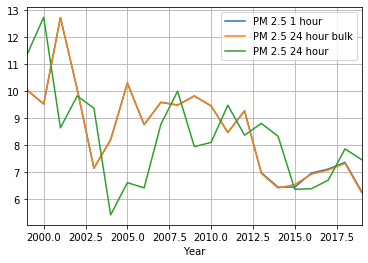

In [14]:
pm_plot = pm2_5_df.plot(kind='line', x='Year',y=['PM 2.5 1 hour','PM 2.5 24 hour bulk','PM 2.5 24 hour'],grid=True)
# pm_plot.show()

In [ ]:
# Abby's section ends here

In [ ]:
# Alan's section starts here

In [ ]:
# Alan's section ends here

In [ ]:
# Brandon's section starts here

In [ ]:
# Brandon's section ends here